# Principal Component Analysis

<ul>
    <li>Gives us a low dimensional view of a dataset.</li>
    <li>It is able to find linear combinations of features and variables that are mutually uncorrelated.</li>
    <li>Linearly uncorrelated varaibles. These are the Principal Components.</li>
    <li>For example loan and LTI ratio in credit scoring are not independent. So we can remove loan and income.</li>
    <li>We can get rid of several unecessary features.</li>
    <li>Also good for visualisation (Before applying the algorithm).</li>
</ul>
<strong style="color:green">WE CAN REMOVE CORRELATED FEATUERES TO REDUCE DIMENSIONS IN THE PROBLEM.</strong><br><br>
<strong style="font-size:19px">UNSUPERVISED LEARNING APPROACH !!!</strong><br>
<ul>
    <li>We have a dataset and we want to find patterns (There are no lables at all).</li>
    <li>We want to apply linear transformations to the data in order to minimize noise and redundancy.</li>
    <li>We end up with a set of principle </li>
    <ul>
        <li>These components describe patterns in the dataset.</li>
        <ul>
            <li>We have to construct the covariance/correlation matrix.</li>
        </ul>
    </ul>
</ul>
<img src = "Images/corrmatrix.png" style="width:500px"/>
<p style="text-align:center"><em>Image from Holczer Balazs's ML course on Udemy.</em></p>
<br>
The covariance matrix contains the information we need.
<ul>
    <li><strong>Diagonal items:</strong> Have something to do with noise.</li>
    <li><strong>Off Diagonal items:</strong> Have something to do with redundancy in the dataset.</li>
</ul>
Principal component algorithm will produce a set of principal components that:
<ul>
    <li><strong>Maximize</strong> feature variance thus reducing the noise.</li>
    <li><strong>Minimize></strong> co-variance between pairs of features thus reducing the redundancy.</li>
</ul>

<strong style="font-size:19px;color:red">2 techniques to find the pricipal compoenents.</strong><br>
First mean centering (z-transformation) is needed.
<ul>
    <li>Calculating the <strong>SVD (Singular valu decomposition)</strong> of the covariance matrix.</li>
    <li>Calculating the <strong>eigenvectors</strong> of the covariance matrix.</li>
</ul>

<strong>After we normalize the data the pricipal components will be linearly independent and orthogonal.</strong>
<ul>
    <li>The data will follow standard normal distribution with mean equal to 0 and standard deviation equal to 1.</li>
</ul>
<img src="Images/eigenvectors.png" style="width:500px"/>
<p style="text-align:center;color:red;font-weight:bold">The yellow lines are the eigen vectors of the dataset.</p>
<p  style="text-align:center;color:red;font-weight:bold">We folow the Kaiser-criterion: Only keep the eigen vectors with eigen values greater than 1.</p>

# <span style="color:purple">CODE (Digits Dataset)</span> 

In [16]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [17]:
digits = load_digits()
print(f"(Number of entries in the dataset , number of features)  =  {digits.data.shape}")
X_digits = digits.data
y_digits = digits.target

(Number of entries in the dataset , number of features)  =  (1797, 64)


In [18]:
# n_components = number of features to keep.
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X_digits)

colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

So with 2 principal components explained variance ratio is : [0.14890594 0.13618771]
This means with 2 components only 28.51% of the original data can be explained. This is not that good!!


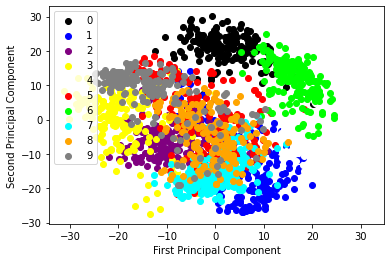

In [28]:
for i in range(len(colors)):
    px = X_pca[:, 0][y_digits == i]
    py = X_pca[:, 1][y_digits == i]
    plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

print(f"So with 2 principal components explained variance ratio is : {estimator.explained_variance_ratio_}")
perc_1 = estimator.explained_variance_ratio_[0]
perc_2 = estimator.explained_variance_ratio_[1]
print(f"This means with 2 components only {round(perc_1*100 + perc_2*100,2)}% of the original data can be explained. This is not that good!!")
plt.show()

So with 30 principal components explained variance ratio is :
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409715 0.01318589 0.01248138
 0.01017717 0.00905617 0.00889537 0.00797118 0.00767448 0.0072287
 0.00695872 0.00596056 0.00575604 0.00514973 0.00489494 0.00428647]

This means with 30 components  95.91% of the original data can be explained. This is much better!!


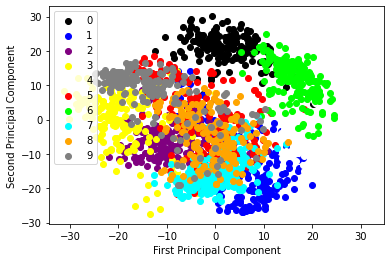

In [32]:
# n_components = number of features to keep.
estimator_2 = PCA(n_components=30)
X_pca_2 = estimator_2.fit_transform(X_digits)

for i in range(len(colors)):
    px = X_pca_2[:, 0][y_digits == i]
    py = X_pca_2[:, 1][y_digits == i]
    plt.scatter(px, py, c=colors[i])
    plt.legend(digits.target_names)

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

print(f"So with 30 principal components explained variance ratio is :")
print(estimator_2.explained_variance_ratio_)
print()

sum=0
for ratio in estimator_2.explained_variance_ratio_:
    sum+=ratio

print(f"This means with 30 components  {round(sum*100,2)}% of the original data can be explained. This is much better!!")
plt.show()

<strong>We should make sure that at least 95% of the original information is kept while using principal component anlysis.</strong>

# <span style="color:purple">CODE (mnist dataset)<spna>

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
mnist_data = fetch_openml('mnist_784', version=1)

features = mnist_data.data
targets = mnist_data.target

In [36]:
train_img, test_img, train_lbl, test_lbl = train_test_split(features, targets, test_size=0.15, random_state=0)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [40]:
print(f"(Number of entries,Number of Features) before using PCA is: {train_img.shape}")

(Number of entries,Number of Features) before using PCA is: (59500, 784)


In [41]:
# we keep 95% variance - so 95% of the original information
pca = PCA(.95)
pca.fit(train_img)

train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

print(f"(Number of entries,Number of Features) after using PCA is: {train_img.shape}")

(Number of entries,Number of Features) after using PCA is: (59500, 327)


<p style="color:green;font-size:19px;font-weight:bold">So we see that PCA has reduced the number of features/dimensions to <em style="font-size:25px">327</em> from <em style="font-size:35px">784</em>.</p>

# <span style="color:orange">END</span>